<a href="https://colab.research.google.com/github/ejrtks1020/Pytorch-basic/blob/main/PyTorch_ANN_%EC%86%90%EA%B8%80%EC%94%A8%EB%B6%84%EB%A5%98_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 숫자 필기 데이터 소개

* 0부터 9까지의 숫자를 손으로 쓴 이미지데이터
* 각 이미지는 0부터 15까지의 명암을 가지는 8 x 8 = 64 픽셀 해상도의 흑백이미지

* 총 1797개의 이미지

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits() # 1979개의 이미지 데이터 로드

In [ ]:
print(digits.images[0]) # 첫번째 샘플 출력

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [ ]:
print(digits.target[0])

0


In [ ]:
print('전체 샘플의 수 : {}'.format(len(digits.images)))

전체 샘플의 수 : 1797


In [ ]:
digits.images.shape

(1797, 8, 8)

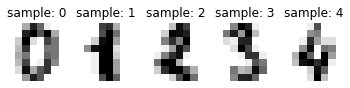

In [ ]:
#전체 샘플 중에서 상위 5개의 샘플만 시각화

images_and_labels = list(zip(digits.images, digits.target))

for index, (image, label) in enumerate(images_and_labels[:5]):
  plt.subplot(1,5, index + 1)
  plt.axis('off')
  plt.imshow(image, cmap = plt.cm.gray_r, interpolation = 'nearest')
  plt.title('sample: %i' % label)

In [ ]:
for i in range(5):
  print(i, '번 인덱스 샘플의 레이블: ',digits.target[i])

0 번 인덱스 샘플의 레이블:  0
1 번 인덱스 샘플의 레이블:  1
2 번 인덱스 샘플의 레이블:  2
3 번 인덱스 샘플의 레이블:  3
4 번 인덱스 샘플의 레이블:  4


In [ ]:
# 8 x 8 행렬이 아니라 64차원의 벡터로 저장
X = digits.data # 이미지, feature vectors
y = digits.target #각 이미지에 대한 레이블

# 2. 다층 퍼셉트론 분류기 만들기

In [ ]:
import torch
import torch.nn as nn
from torch import optim

In [ ]:
model = nn.Sequential(
    nn.Linear(64,32), # input_layer = 64, hidden_layer1 = 32
    nn.ReLU(),
    nn.Linear(32,16), # hidden_layer1 = 32, hidden_layer2 = 16
    nn.ReLU(),
    nn.Linear(16,10) #hidden_layer2 = 16 ,output_layer = 10
    #nn.Softmax() <- 비용함수에 이미 포함되어있으므로 사용하지않는다
)

In [ ]:
X = torch.tensor(X, dtype = torch.float32)
y = torch.tensor(y, dtype = torch.int64)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


In [ ]:
loss_fn = nn.CrossEntropyLoss() # 이 비용 함수는 소프트 맥스 함수를 포함하고 있음

In [ ]:
optimizer = optim.Adam(model.parameters())

In [ ]:
losses = []

In [ ]:
for epoch in range(100):
  optimizer.zero_grad()
  y_pred = model(X)
  loss = loss_fn(y_pred, y)
  loss.backward()
  optimizer.step()

  if epoch % 10 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, 100, loss.item()
    ))

  losses.append(loss.item())

Epoch    0/100 Cost: 2.534220
Epoch   10/100 Cost: 2.044733
Epoch   20/100 Cost: 1.743957
Epoch   30/100 Cost: 1.411858
Epoch   40/100 Cost: 1.073295
Epoch   50/100 Cost: 0.768646
Epoch   60/100 Cost: 0.528785
Epoch   70/100 Cost: 0.376419
Epoch   80/100 Cost: 0.284139
Epoch   90/100 Cost: 0.226925


Text(0, 0.5, 'Loss')

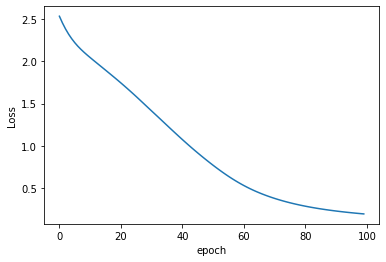

In [ ]:
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('Loss')
